In [460]:
import pandas as pd
import seaborn as sns

In [157]:
epic='https://github.com/zhou-lab/InfiniumAnnotationV1/raw/main/Anno/EPIC/EPIC.hg38.manifest.tsv.gz'
df=pd.read_table(epic,index_col='Probe_ID',usecols=['Probe_ID','CpG_chrm','CpG_beg'])
df.dropna(inplace=True)
df['CpG_beg']=df['CpG_beg'].astype(int)

In [47]:
mono='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56046/suppl/GSE56046_methylome_normalized.txt.gz'
mono=pd.read_table(mono,index_col=0,usecols=[0]+list(range(1,21,2)))

In [48]:
mono=(mono.pow(2)/(mono.pow(2)+1)).copy()

In [54]:
dg=df.merge(mono,left_index=True,right_index=True)

In [95]:
dc=dg[dg['CpG_chrm']=='chr14'].sort_values('CpG_beg')
dc[dc['CpG_beg']>=22479508][dc['CpG_beg']<=22513795].mean()

/tmp/ipykernel_18223/4254306867.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc[dc['CpG_beg']>=	22479508		][dc['CpG_beg']<=22513795].mean()
/tmp/ipykernel_18223/4254306867.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dc[dc['CpG_beg']>=	22479508		][dc['CpG_beg']<=22513795].mean()


CpG_beg          2.250063e+07
100001.Mvalue    2.593837e-01
100004.Mvalue    2.032546e-01
100007.Mvalue    1.961358e-01
100014.Mvalue    2.482167e-01
100018.Mvalue    1.938082e-01
100021.Mvalue    2.546608e-01
100022.Mvalue    1.655416e-01
100023.Mvalue    1.870954e-01
100028.Mvalue    1.620804e-01
100035.Mvalue    2.107907e-01
dtype: float64

In [ ]:
wb='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41169/matrix/GSE41169_series_matrix.txt.gz'
wb=pd.read_table(wb,skiprows=72,index_col=0)

In [413]:
%%time
#t='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56581/suppl/GSE56581_methylome_normalized.txt.gz'
t='data/cell/GSE56581_methylome_signal_intensities.txt'
cols=[0]+list(range(1,643,3))+list(range(2,643,3))
t=pd.read_table(t,index_col=0,usecols=cols)

CPU times: user 35 s, sys: 4 s, total: 39 s
Wall time: 39 s


In [414]:
cols=sorted(list(set(t.columns.str.split('.').str[0])))
for i in cols:
    t[i+'.methylated']=(t[i+'.methylated']/(t[i+'.methylated']+t[i+'.unmethylated']))
t=t[[c+'.methylated' for c in cols]].copy()
t.columns=[int(c) for c in cols]

In [415]:
t=t.clip(0,1)

In [417]:
dg=df.merge(t,left_index=True,right_index=True)

In [495]:
dc=dg[dg['CpG_chrm']=='chr14'][dg['CpG_beg']>=22479508].sort_values('CpG_beg').copy()
m1=dc[dc['CpG_beg']<=22542765].copy().drop(['CpG_chrm','CpG_beg'],axis=1)
m1=pd.DataFrame(pd.concat([m1.mean(),wb.loc[m1.index].mean()]).rename('m1'))

/tmp/ipykernel_18223/4045396747.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc=dg[dg['CpG_chrm']=='chr14'][dg['CpG_beg']>=22479508].sort_values('CpG_beg').copy()


In [496]:
dc2=dg[dg['CpG_chrm']=='chr21'][dg['CpG_beg']>=42403334].sort_values('CpG_beg').copy()
dc2=dc2[dc2['CpG_beg']<=42406968].drop(['CpG_chrm','CpG_beg'],axis=1)
m2=pd.DataFrame(pd.concat([dc2.mean(),wb.loc[dc2.index].mean()]).rename('m2'))

/tmp/ipykernel_18223/2440160280.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc2=dg[dg['CpG_chrm']=='chr21'][dg['CpG_beg']>=42403334].sort_values('CpG_beg').copy()


In [501]:
dc2=dg[dg['CpG_chrm']=='chr11'][dg['CpG_beg']>=118338567].sort_values('CpG_beg').copy()
dc2=dc2[dc2['CpG_beg']<=118345883].drop(['CpG_chrm','CpG_beg'],axis=1)
m2=pd.DataFrame(pd.concat([dc2.mean(),wb.loc[dc2.index].mean()]).rename('m2'))

/tmp/ipykernel_18223/3369750014.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc2=dg[dg['CpG_chrm']=='chr11'][dg['CpG_beg']>=118338567].sort_values('CpG_beg').copy()


<Axes: xlabel='m1', ylabel='m2'>

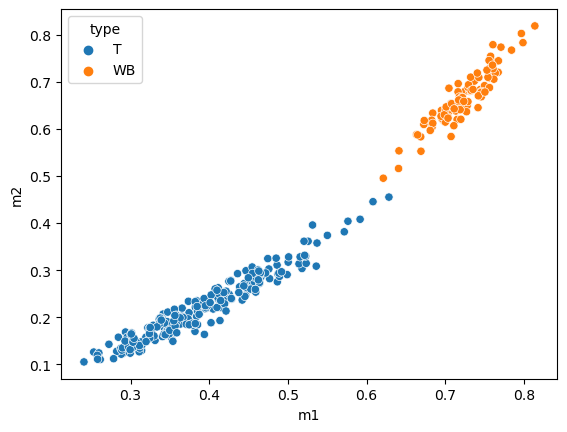

In [502]:
conc=pd.concat([m1,m2],axis=1)
conc['type']=['T']*len(t.columns)+['WB']*len(wb.columns)
sns.scatterplot(conc,x='m1',y='m2',hue='type')

In [514]:
nut='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE63nnn/GSE63499/matrix/GSE63499_series_matrix.txt.gz'
nut=pd.read_table(nut,skiprows=65,index_col=0)

In [555]:
nu=nut[['GSM1551105','GSM1551106','GSM1551107','GSM1551109','GSM1551111','GSM1551108','GSM1551110','GSM1551112','GSM1551114','GSM1551116']].copy()

In [562]:
nu['nu']=nut[['GSM1551105','GSM1551106','GSM1551107','GSM1551109','GSM1551111']].mean(1)
nu['wb']=nut[['GSM1551108','GSM1551110','GSM1551112']].mean(1)

In [563]:
dg=df.merge(nu,left_index=True,right_index=True)

In [591]:
dc=dg[dg['CpG_chrm']=='chr7'][dg['CpG_beg']>=2076535].sort_values('CpG_beg').copy()
m1=dc[dc['CpG_beg']<=2077217].copy().drop(['CpG_chrm','CpG_beg'],axis=1)
#m1=pd.DataFrame(pd.concat([m1.mean(),wb.loc[m1.index].mean()]).rename('m1'))
m1.mean()

GSM1551105    0.270335
GSM1551106    0.235784
GSM1551107    0.269386
GSM1551109    0.306919
GSM1551111    0.190874
GSM1551108    0.548292
GSM1551110    0.636637
GSM1551112    0.450762
GSM1551114    0.454667
GSM1551116    0.465153
nu            0.254660
wb            0.545231
dtype: float64

In [593]:
dc=dg[dg['CpG_chrm']=='chr16'][dg['CpG_beg']>=88839895].sort_values('CpG_beg').copy()
m1=dc[dc['CpG_beg']<=88841054].copy().drop(['CpG_chrm','CpG_beg'],axis=1)
#m1=pd.DataFrame(pd.concat([m1.mean(),wb.loc[m1.index].mean()]).rename('m1'))
m1.mean()

/tmp/ipykernel_18223/3893985181.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc=dg[dg['CpG_chrm']=='chr16'][dg['CpG_beg']>=88839895].sort_values('CpG_beg').copy()


GSM1551105    0.296266
GSM1551106    0.239133
GSM1551107    0.291441
GSM1551109    0.280689
GSM1551111    0.171143
GSM1551108    0.416473
GSM1551110    0.506457
GSM1551112    0.383564
GSM1551114    0.390712
GSM1551116    0.406597
nu            0.255734
wb            0.435498
dtype: float64